In [40]:
library(dplyr)
library(ggplot2)
library(readr)
library(magrittr)

In [41]:
d_upper <- read_delim('dfe_outfile_upper_between_centrality.csv', delim = ' ', col_names = FALSE);
d_lower <- read_delim('dfe_outfile_lower_between_centrality.csv', delim = ' ', col_names = FALSE);
dim(d_upper); dim(d_lower);

head(d_upper); head(d_lower)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_character()
)


[1] 101  13

[1] 101  13

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,0.226994,1,10,0.064960,10,100,0.083547,100,-99,0.624499,NA
0,1,0.171308,1,10,0.051011,10,100,0.066201,100,-99,0.711480,NA
0,1,0.164091,1,10,0.058642,10,100,0.079597,100,-99,0.697670,NA
0,1,0.236975,1,10,0.035485,10,100,0.040798,100,-99,0.686742,NA
0,1,0.220208,1,10,0.086711,10,100,0.120780,100,-99,0.572301,NA
0,1,0.222859,1,10,0.059714,10,100,0.075713,100,-99,0.641715,NA


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,0.209375,1,10,0.062159,10,100,0.080611,100,-99,0.647854,NA
0,1,0.220286,1,10,0.055128,10,100,0.068925,100,-99,0.655661,NA
0,1,0.221129,1,10,0.056743,10,100,0.071304,100,-99,0.650824,NA
0,1,0.233102,1,10,0.029710,10,100,0.033497,100,-99,0.703690,NA
0,1,0.252998,1,10,0.030870,10,100,0.034637,100,-99,0.681495,NA
0,1,0.220133,1,10,0.057253,10,100,0.072144,100,-99,0.650471,NA


In [42]:
library(purrr)
library(tidyr)

In [43]:
dfe <- lapply(ls(pattern = 'd*r'), get)
names(dfe) <- ls(pattern = 'd*r')

In [44]:
lapply(dfe, function(df) head(df))

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,0.209375,1,10,0.062159,10,100,0.080611,100,-99,0.647854,NA
0,1,0.220286,1,10,0.055128,10,100,0.068925,100,-99,0.655661,NA
0,1,0.221129,1,10,0.056743,10,100,0.071304,100,-99,0.650824,NA
0,1,0.233102,1,10,0.029710,10,100,0.033497,100,-99,0.703690,NA
0,1,0.252998,1,10,0.030870,10,100,0.034637,100,-99,0.681495,NA
0,1,0.220133,1,10,0.057253,10,100,0.072144,100,-99,0.650471,NA
X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,0.226994,1,10,0.064960,10,100,0.083547,100,-99,0.624499,NA
0,1,0.171308,1,10,0.051011,10,100,0.066201,100,-99,0.711480,NA
0,1,0.164091,1,10,0.058642,10,100,0.079597,100,-99,0.697670,NA


In [45]:
dfe %<>% 
    lapply(function(df) select(df, group_1 = X3, group_2 = X6, group_3 = X9, group_4 = X12))
        
lapply(dfe, function(df) head(df))       

group_1,group_2,group_3,group_4
0.209375,0.062159,0.080611,0.647854
0.220286,0.055128,0.068925,0.655661
0.221129,0.056743,0.071304,0.650824
0.233102,0.029710,0.033497,0.703690
0.252998,0.030870,0.034637,0.681495
0.220133,0.057253,0.072144,0.650471
group_1,group_2,group_3,group_4
0.226994,0.064960,0.083547,0.624499
0.171308,0.051011,0.066201,0.711480
0.164091,0.058642,0.079597,0.697670


In [46]:
dfe_full <- reduce(dfe, bind_cols)

head(dfe_full)

group_1,group_2,group_3,group_4,group_11,group_21,group_31,group_41
0.209375,0.062159,0.080611,0.647854,0.226994,0.064960,0.083547,0.624499
0.220286,0.055128,0.068925,0.655661,0.171308,0.051011,0.066201,0.711480
0.221129,0.056743,0.071304,0.650824,0.164091,0.058642,0.079597,0.697670
0.233102,0.029710,0.033497,0.703690,0.236975,0.035485,0.040798,0.686742
0.252998,0.030870,0.034637,0.681495,0.220208,0.086711,0.120780,0.572301
0.220133,0.057253,0.072144,0.650471,0.222859,0.059714,0.075713,0.641715


In [47]:
dfe_full %<>% rename('0-1 lower' = group_1, '1-10 lower' = group_2, '10-100 lower' = group_3, '100-infinity lower' = group_4,
                    '0-1 upper' = group_11, '1-10 upper' = group_21, '10-100 upper' = group_31, '100-infinity upper' = group_41)

head(dfe_full)

0-1 lower,1-10 lower,10-100 lower,100-infinity lower,0-1 upper,1-10 upper,10-100 upper,100-infinity upper
0.209375,0.062159,0.080611,0.647854,0.226994,0.064960,0.083547,0.624499
0.220286,0.055128,0.068925,0.655661,0.171308,0.051011,0.066201,0.711480
0.221129,0.056743,0.071304,0.650824,0.164091,0.058642,0.079597,0.697670
0.233102,0.029710,0.033497,0.703690,0.236975,0.035485,0.040798,0.686742
0.252998,0.030870,0.034637,0.681495,0.220208,0.086711,0.120780,0.572301
0.220133,0.057253,0.072144,0.650471,0.222859,0.059714,0.075713,0.641715


In [48]:
dfe_full %<>%
    gather(group, value)

head(dfe_full)

group,value
0-1 lower,0.209375
0-1 lower,0.220286
0-1 lower,0.221129
0-1 lower,0.233102
0-1 lower,0.252998
0-1 lower,0.220133


In [49]:
dfe_full_cis <- dfe_full %>%
    group_by(group) %>%
    summarise(group_mean = mean(value), group_sd = sd(value), group_n = n()) %>%
    mutate(error = qt(0.975, df = (group_n - 1)) * ((group_sd) / sqrt(group_n))) %>%
    mutate(error_left = group_mean - error, error_right = group_mean + error) %>%
    separate(group, c('range', 'type_of'), sep = ' ') %>%
    mutate(type_of = case_when(type_of == 'lower' ~ 'bottom 10%', type_of == 'upper' ~ 'top 10%'))

dfe_full_cis

range,type_of,group_mean,group_sd,group_n,error,error_left,error_right
0-1,bottom 10%,0.23549807,0.02555472,101,0.005044822,0.23045325,0.24054289
0-1,top 10%,0.21142696,0.02393343,101,0.004724759,0.20670220,0.21615172
1-10,bottom 10%,0.05412534,0.01714593,101,0.003384821,0.05074052,0.05751016
1-10,top 10%,0.05563134,0.01683274,101,0.003322993,0.05230834,0.05895433
10-100,bottom 10%,0.06811457,0.02599916,101,0.005132560,0.06298201,0.07324713
10-100,top 10%,0.07180735,0.02616605,101,0.005165506,0.06664184,0.07697285
100-infinity,bottom 10%,0.64226207,0.04541391,101,0.008965275,0.63329679,0.65122734
100-infinity,top 10%,0.66113429,0.04766794,101,0.009410250,0.65172404,0.67054454


In [50]:
dfe_full_cis$range[1]

[1] "0-1"

In [54]:
my.plot<-ggplot(dfe_full_cis, aes(x = factor(range), y = group_mean, fill = factor(type_of))) + 
geom_bar(stat = 'identity', position = 'dodge') +
geom_errorbar(aes(ymin = error_left, ymax = error_right), position = position_dodge(0.9), width = 0.3, size = 0.8) +
theme_linedraw() +
# scale_fill_brewer(palette = 9, direction = 1) +
# scale_fill_manual(values=c("#c76650","#990000")) + red
scale_fill_manual(values=c("#a6a6a6","#990000")) +

xlab(expression(paste(N[e], 's'))) +
ylab('proportion of mutations') +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_line(),
      axis.text = element_text(size = 14),
      axis.title = element_text(size = 14)) +
theme(legend.position = c(0.77, 0.92)) +
guides(fill = guide_legend(title = expression(paste("Measure: betweenness centrality")))) +
coord_cartesian(y = c(0, 1))
ggsave(plot=my.plot, "./bw_props.png")

Saving 6.67 x 6.67 in image


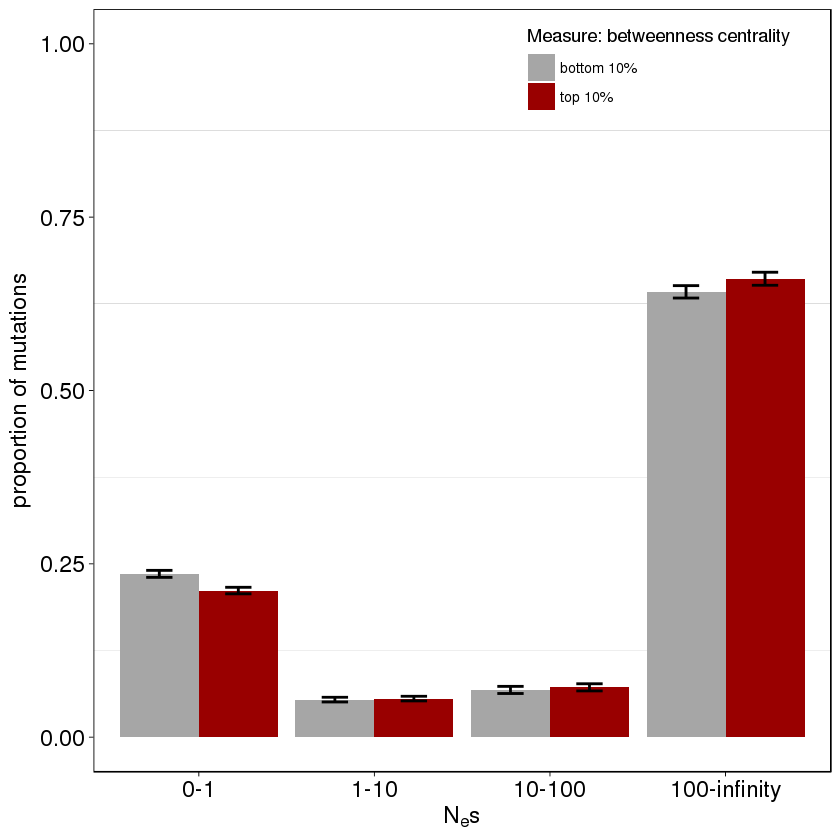

In [55]:
my.plot

from https://www.cyclismo.org/tutorial/R/confidence.html

> mean <- 5
> sd <- 2
> sample size <- 20
> error <- qt(0.975,df=n-1)*s/sqrt(n)
> left <- a-error
> right <- a+error
> left
[1] 4.063971
> right
[1] 5.936029